<a href="https://colab.research.google.com/github/sharvanitamaskar/Principle-Component-Analysis-using-Differential-Privacy/blob/main/PrivatePCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import numpy as np
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()


Saving u.data to u.data


In [49]:
df = pd.read_csv("u.data",sep='\t', header=None)

In [50]:
df.head(15)

,0,1,2,3
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [51]:
#preprocess
df.columns = ['UserID', 'MovieID', 'Rating', 'Timestamp']
df = df.astype({
    'UserID': 'int',
    'MovieID': 'int',
    'Rating': 'int',
    'Timestamp': 'int'
})

print(df)

       UserID  MovieID  Rating  Timestamp
0         196      242       3  881250949
1         186      302       3  891717742
2          22      377       1  878887116
3         244       51       2  880606923
4         166      346       1  886397596
...       ...      ...     ...        ...
99995     880      476       3  880175444
99996     716      204       5  879795543
99997     276     1090       1  874795795
99998      13      225       2  882399156
99999      12      203       3  879959583

[100000 rows x 4 columns]


In [52]:
df['UserID'].unique()

array([196, 186,  22, 244, 166, 298, 115, 253, 305,   6,  62, 286, 200,
       210, 224, 303, 122, 194, 291, 234, 119, 167, 299, 308,  95,  38,
       102,  63, 160,  50, 301, 225, 290,  97, 157, 181, 278, 276,   7,
        10, 284, 201, 287, 246, 242, 249,  99, 178, 251,  81, 260,  25,
        59,  72,  87,  42, 292,  20,  13, 138,  60,  57, 223, 189, 243,
        92, 241, 254, 293, 127, 222, 267,  11,   8, 162, 279, 145,  28,
       135,  32,  90, 216, 250, 271, 265, 198, 168, 110,  58, 237,  94,
       128,  44, 264,  41,  82, 262, 174,  43,  84, 269, 259,  85, 213,
       121,  49, 155,  68, 172,  19, 268,   5,  80,  66,  18,  26, 130,
       256,   1,  56,  15, 207, 232,  52, 161, 148, 125,  83, 272, 151,
        54,  16,  91, 294, 229,  36,  70,  14, 295, 233, 214, 192, 100,
       307, 297, 193, 113, 275, 219, 218, 123, 158, 302,  23, 296,  33,
       154,  77, 270, 187, 170, 101, 184, 112, 133, 215,  69, 104, 240,
       144, 191,  61, 142, 177, 203,  21, 197, 134, 180, 236, 26

In [53]:
len(df['UserID'].unique())
# we have 953 uniqiue users whose uder ID ranges from 1->943

943

In [54]:
df['MovieID'].unique()

array([ 242,  302,  377, ..., 1637, 1630, 1641])

In [55]:
len(df['MovieID'].unique())
#Each user has voted for atleast 20 movies

1682

In [56]:
df['UserID'].isnull().sum()
#check for nulls

0

In [57]:
df['MovieID'].isnull().sum()
#no null nulls present

0

In [58]:
df['Rating'].min()

1

In [59]:
df['Rating'].max()

5

In [60]:
df.UserID = df.UserID.astype('category').cat.codes.values
df.MovieID = df.MovieID.astype('category').cat.codes.values

In [61]:
df['UserID'].value_counts(ascending=True)

UserID
363     20
823     20
635     20
142     20
630     20
      ... 
275    518
449    540
12     636
654    685
404    737
Name: count, Length: 943, dtype: int64

In [62]:
df['MovieID'].unique()

array([ 241,  301,  376, ..., 1636, 1629, 1640], dtype=int16)

In [63]:
index=list(df['UserID'].unique())
columns=list(df['MovieID'].unique())
index=sorted(index)
columns=sorted(columns)

util_df=pd.pivot_table(data=df,values='Rating',index='UserID',columns='MovieID')

In [64]:
util_df
#nulls show the movies unrated by users

MovieID,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
UserID,,,,,,,,,,,,,,,,,,,,,
0,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
util_df=util_df.fillna(0)

In [85]:
class MatrixDataLoader:
  def __init__(self):
        self.A = None
  def load_dataset(self, df):
        self.A = df.values
  def generate_gaussian_matrix(self, rows, columns, mean=0, std_dev=1):
    """Generate a matrix with Gaussian distributed values."""
    self.A = np.random.normal(mean, std_dev, (rows, columns))

loader = MatrixDataLoader()


In [67]:
loader.load_dataset(util_df)
print("Dataset loaded into matrix A:\n", loader.A)

Dataset loaded into matrix A:
 [[5. 3. 4. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]]


In [86]:
loader.generate_gaussian_matrix(rows=100, columns=100, mean=0, std_dev=1)
print("Synthetic Gaussian matrix A:\n", loader.A)

Synthetic Gaussian matrix A:
 [[ 1.30161485 -2.05649071  0.54840569 ... -0.19273049 -0.92681849
   0.2659865 ]
 [ 0.90453499 -0.4290323   0.2258837  ...  2.10183494  0.43696335
  -0.18018272]
 [-0.01054744 -0.68855012 -0.84866683 ...  0.60371543 -0.08064109
  -1.51766113]
 ...
 [ 0.59237282  0.9959816  -0.6172319  ...  0.81995347 -0.68964746
   2.86860884]
 [-0.28951424 -0.01960394  0.48100577 ... -1.17939832  0.31433968
  -2.34327467]
 [ 0.60080232 -1.80601908  1.21534688 ...  1.29667471  1.72027749
   0.72095569]]


In [87]:
Ag=loader.A

In [88]:
U, S, VT = np.linalg.svd(np.dot(Ag.T,Ag))
print("U:\n", U) #direction in the original space where your data lies.
print("Singular Values:", S) #contains the singular values of Ag
#square roots of the eigenvalues AgAg(t)
print("VT:\n", VT) #contains the right singular vectors of Ag
#captures features and pattersn of Ag

U:
 [[ 0.05894578 -0.01569564  0.04780182 ...  0.07064279  0.16409752
   0.07448951]
 [ 0.16401051  0.16983093  0.0761653  ...  0.12025976 -0.00246094
  -0.01090635]
 [ 0.14111301 -0.03667271 -0.26958378 ... -0.02852642 -0.03395646
  -0.08154773]
 ...
 [-0.02017936  0.0184343  -0.07135707 ... -0.04231683  0.06648871
  -0.03425515]
 [-0.07014707 -0.15378341 -0.05109078 ...  0.05531885  0.04256874
   0.07904378]
 [ 0.02232269  0.08584223  0.13296658 ...  0.03556762 -0.00823522
  -0.01318492]]
Singular Values: [3.89939840e+02 3.69260479e+02 3.32701011e+02 3.29367000e+02
 3.27088456e+02 3.21215065e+02 3.02393925e+02 2.82156489e+02
 2.77802424e+02 2.68538711e+02 2.58152422e+02 2.55285772e+02
 2.39443603e+02 2.36369757e+02 2.27305189e+02 2.19926089e+02
 2.09710312e+02 2.03465590e+02 1.99424560e+02 1.97839310e+02
 1.94673753e+02 1.90016954e+02 1.76691468e+02 1.71147076e+02
 1.68544082e+02 1.67570260e+02 1.51833311e+02 1.50659145e+02
 1.44078652e+02 1.39589705e+02 1.36534381e+02 1.34535936e+02

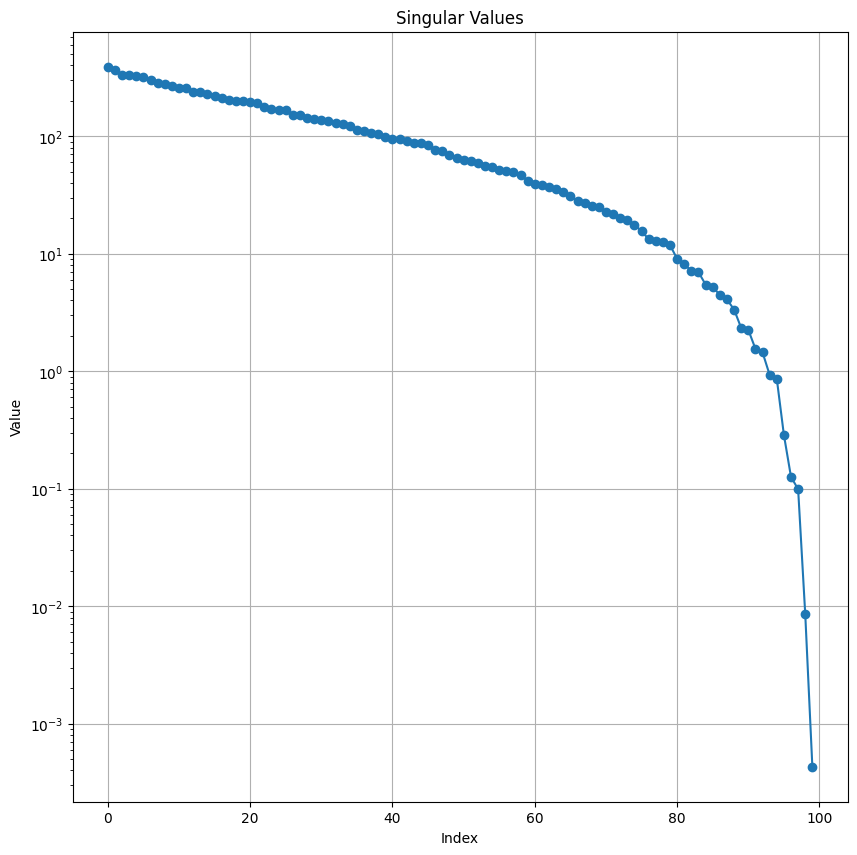

In [89]:
#output/plot separet singular values for movie lens

import matplotlib.pyplot as plt
# plotting the singular values
plt.figure(figsize=(10, 10))
plt.plot(S, marker='o')
plt.title('Singular Values')
plt.xlabel('Index') #gives position of each singular value in the Σ matrix, starting from 0
plt.ylabel('Value') #magnitude of each singular value on a logarithmic scale
plt.yscale('log')
# log scale to see the drop off graph clearly
plt.grid(True)
plt.show()

In [90]:
k_values = range(1, 11, 1)  # values of k to iterate over
approximations = []  # store the rank-k approximations

for k in k_values:
    if k == 0: continue
    U_k = U[:, :k]  # get the first k columns of U
    S_k_diag = np.diag(S[:k])  # create diagonal matrix from the first k singular values
    VT_k = VT[:k, :]  # get the first k rows of VT

    # calculate the rank-k approximation
    A_k = np.dot(U_k, np.dot(S_k_diag, VT_k))

    approximations.append(A_k)
    print(f"Rank-{k} Approximation of Ag^TAg:\n", A_k)

Rank-1 Approximation of Ag^TAg:
 [[ 1.35488693  3.7698321   3.24352612 ... -0.46382885 -1.61235201
   0.51309392]
 [ 3.7698321  10.4891661   9.0247744  ... -1.29055558 -4.48620194
   1.42763051]
 [ 3.24352612  9.0247744   7.76482631 ... -1.11038121 -3.85988362
   1.22831912]
 ...
 [-0.46382885 -1.29055558 -1.11038121 ...  0.15878609  0.55196885
  -0.17565138]
 [-1.61235201 -4.48620194 -3.85988362 ...  0.55196885  1.91874241
  -0.61059561]
 [ 0.51309392  1.42763051  1.22831912 ... -0.17565138 -0.61059561
   0.194308  ]]
Rank-2 Approximation of Ag^TAg:
 [[ 1.44585534e+00  2.78552976e+00  3.45607302e+00 ... -5.70669977e-01
  -7.21057513e-01  1.55714360e-02]
 [ 2.78552976e+00  2.11395778e+01  6.72496064e+00 ... -1.34506303e-01
  -1.41302442e+01  6.81095539e+00]
 [ 3.45607302e+00  6.72496064e+00  8.26144029e+00 ... -1.36001456e+00
  -1.77738186e+00  6.58622178e-02]
 ...
 [-5.70669977e-01 -1.34506303e-01 -1.36001456e+00 ...  2.84269497e-01
  -4.94844024e-01  4.08681786e-01]
 [-7.21057513e-01

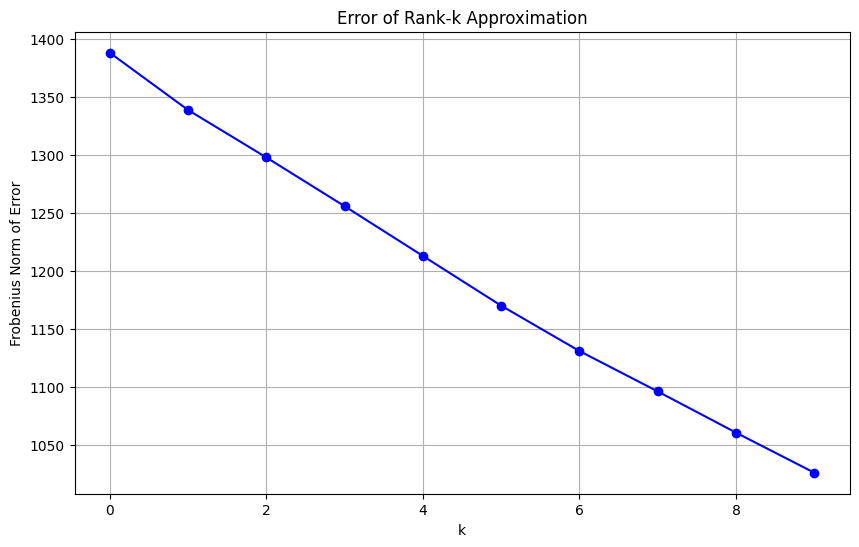

In [98]:
Ag_T_Ag = np.dot(Ag.T, Ag)

# Frobenius norm of the error for each approximation
errors = [np.linalg.norm(Ag_T_Ag - A_k, 'fro') for A_k in approximations]

plt.figure(figsize=(10, 6))
plt.plot(errors, marker='o', linestyle='-', color='blue')  # Skipping the first k=0 as it's not used
plt.title('Error of Rank-k Approximation')
plt.xlabel('k')
plt.ylabel('Frobenius Norm of Error')
plt.grid(True)
plt.show()

In [92]:
noise_mean = 0  #mean of the Gaussian noise
noise_std_dev = 0.1  #std deviation of the Gaussian noise
rows, columns = Ag.shape #Shape of Ag
noise = np.random.normal(noise_mean, noise_std_dev, (rows, columns))
#generating Gaussian noise with the same shape
Ag_noisy = Ag + noise #adding the noise
print("Rank-k Approximation of AgAg^T with Gaussian Noise:\n", Ag_noisy)

Rank-k Approximation of AgAg^T with Gaussian Noise:
 [[ 1.08337273 -2.08907121  0.61010083 ... -0.20636197 -0.90771218
   0.37602854]
 [ 0.88508501 -0.37108445  0.0682105  ...  2.12509963  0.34676744
  -0.27456997]
 [ 0.20261662 -0.72172235 -0.90533634 ...  0.6453671  -0.14468828
  -1.43233206]
 ...
 [ 0.73986735  1.11057201 -0.55052547 ...  0.81886562 -0.90013601
   2.84195254]
 [-0.2476672  -0.05752332  0.61081492 ... -1.15185751  0.05447246
  -2.47598678]
 [ 0.53152797 -1.57194026  1.22274719 ...  1.20524716  1.55101537
   0.88150908]]


In [93]:
U_noisy, S_noisy, VT_noisy = np.linalg.svd(np.dot(Ag_noisy.T,Ag_noisy))
print("U_noisy:\n", U_noisy)
print("Singular Values:", S_noisy)
print("VT_noisy:\n", VT_noisy)

U_noisy:
 [[-6.72118445e-02  6.66129767e-03 -3.39683165e-02 ...  4.15506929e-02
   6.10424347e-02  1.37690409e-01]
 [-1.65873416e-01  1.36050723e-01 -2.15058774e-02 ...  5.35522399e-02
   3.06619002e-02  2.23705295e-02]
 [-1.30844404e-01 -1.60237082e-02 -1.62804917e-01 ... -1.19604040e-02
  -5.23879785e-03 -1.55336091e-04]
 ...
 [ 3.44135341e-02  1.49164520e-02 -4.25365985e-02 ...  9.95041069e-02
   7.42982332e-02  3.48546964e-02]
 [ 6.33880774e-02 -1.27599244e-01 -4.62969921e-02 ... -4.66704767e-02
  -7.18790833e-02  1.51465102e-01]
 [-2.37981541e-02  7.41953404e-02  1.09993357e-01 ...  9.41056691e-02
   7.64067976e-02 -3.12244810e-02]]
Singular Values: [3.96385317e+02 3.71699015e+02 3.38191138e+02 3.31495552e+02
 3.28678005e+02 3.17353800e+02 3.10958146e+02 2.87421868e+02
 2.77271100e+02 2.67453524e+02 2.63376317e+02 2.52149925e+02
 2.41173478e+02 2.38493526e+02 2.25301843e+02 2.22107333e+02
 2.11016971e+02 2.07382026e+02 1.99047837e+02 1.97689782e+02
 1.95541778e+02 1.92540340e+02 1

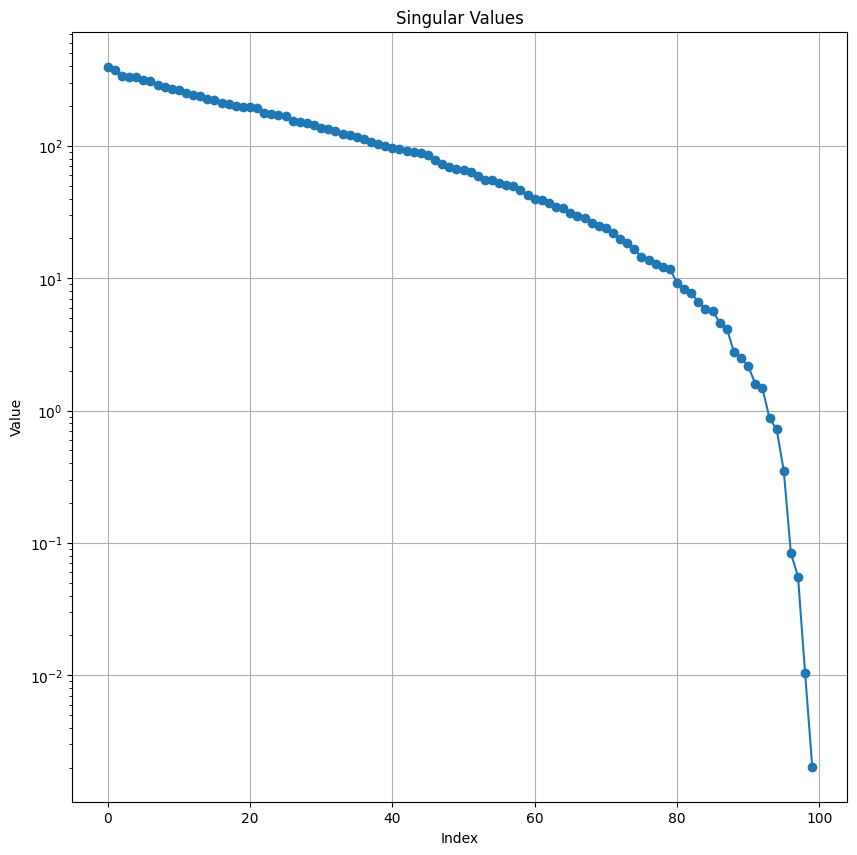

In [94]:
plt.figure(figsize=(10, 10))
plt.plot(S_noisy, marker='o')
plt.title('Singular Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.yscale('log')
plt.grid(True)
plt.show()

In [95]:
k_values = range(1, 11, 1)
approximations = []

for k in k_values:
    if k == 0: continue
    U_k_noisy = U_noisy[:, :k]
    S_k_diag_noisy = np.diag(S_noisy[:k])
    VT_k_noisy = VT_noisy[:k, :]

    A_k_noisy = np.dot(U_k_noisy, np.dot(S_k_diag_noisy, VT_k_noisy))

    approximations.append(A_k_noisy)
    print(f"Rank-{k} Approximation of Ag^TAg:\n", A_k_noisy)

Rank-1 Approximation of Ag^TAg:
 [[ 1.79064373  4.41916443  3.48592892 ... -0.91683809 -1.68877174
   0.63402538]
 [ 4.41916443 10.90614173  8.60299167 ... -2.26268252 -4.16775256
   1.56472356]
 [ 3.48592892  8.60299167  6.78621895 ... -1.78485108 -3.28761
   1.23428652]
 ...
 [-0.91683809 -2.26268252 -1.78485108 ...  0.46943569  0.86467801
  -0.32463109]
 [-1.68877174 -4.16775256 -3.28761    ...  0.86467801  1.59269537
  -0.59795487]
 [ 0.63402538  1.56472356  1.23428652 ... -0.32463109 -0.59795487
   0.22449367]]
Rank-2 Approximation of Ag^TAg:
 [[  1.80713709   4.75602572   3.44625425 ...  -0.87990499  -2.00470718
    0.81773288]
 [  4.75602572  17.78621587   7.79267403 ...  -1.50835874 -10.62043607
    5.31677596]
 [  3.44625425   7.79267403   6.8816561  ...  -1.87369342  -2.52762934
    0.79237933]
 ...
 [ -0.87990499  -1.50835874  -1.87369342 ...   0.55213892   0.15721286
    0.08673982]
 [ -2.00470718 -10.62043607  -2.52762934 ...   0.15721286   7.64453778
   -4.11692955]
 [  0

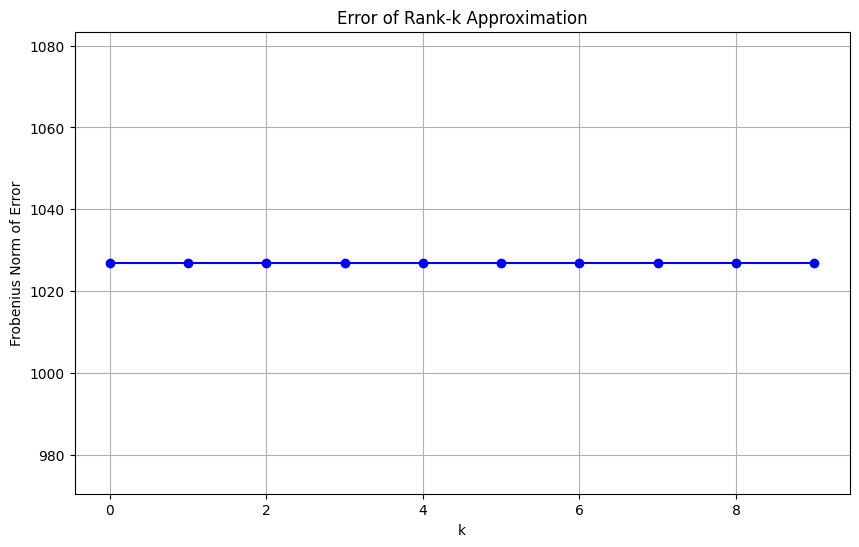

In [99]:
Ag_T_Ag_noisy = np.dot(Ag_noisy.T, Ag_noisy)

errors = [np.linalg.norm(Ag_T_Ag_noisy - A_k_noisy, 'fro') for A_k in approximations]

plt.figure(figsize=(10, 6))
plt.plot(errors, marker='o', linestyle='-', color='blue')
plt.title('Error of Rank-k Approximation')
plt.xlabel('k')
plt.ylabel('Frobenius Norm of Error')
plt.grid(True)
plt.show()

In [97]:
mse = np.mean((A_k_noisy - A_k) ** 2)
print("MSE", mse)

MSE 4.100055402612628
